***MINI_PROJECT _4 : Swiggy’s Restaurant Recommendation System using Streamlit***
-

***IMPORTING THE LIBIRAIES***
-

In [8]:
!pip install plotly_express

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

***TO READ THE CSV FILE***

In [10]:
data = pd.read_csv(r"C:\Users\KRHA1002\OneDrive - Nielsen IQ\Profile\GUVI\Project 4\swiggy.csv")

***TO VIEW THE FIRST 5 ROWS***

In [11]:
data.head(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


***TO VIEW THE LAST FIVE ROWS***

In [12]:
data.tail(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


***TO FIND THE SHAPE OF THE DATASET***

In [13]:
data.shape

(148541, 11)

***Columns Explanation:***
-
>id: Unique identifier for each restaurant.

>name: Name of the restaurant.

>city: City where the restaurant is located.

>rating: Average customer rating of the restaurant (out of 5 stars). If the restaurant has too few ratings, the value like this "--".

>rating_count: The number of ratings received by the restaurant (e.g., "50+ ratings" means it has received at least 50 ratings).

>cost: The approximate cost for two people at the restaurant (e.g., ₹200 means an average meal costs ₹200).

>cuisine: Type of cuisine offered (e.g., Beverages, Pizzas, Sweets, Fast Food, Indian).

>lic_no: License number of the restaurant, possibly related to food safety regulations.

>link: URL to the restaurant’s Swiggy page.

>address: location of the restaurant.

>menu: File path to a JSON menu file containing detailed menu items for the restaurant





***TO FIND THE INFORMATION OF THE DATASET***

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


***TO IDENTIFY THE DETAILS FOR CATEGORICAL CLOUMNS***
-

In [15]:
data.describe(include=object)

,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
count,148455,148541,148455,148455,148410,148442,148312,148541,148455,148541
unique,112818,821,42,8,363,2132,108763,148541,148401,148541
top,Domino's Pizza,Bikaner,--,Too Few Ratings,₹ 200,"North Indian,Chinese",license,https://www.swiggy.com/restaurants/ab-foods-po...,"Gold Star Biryani, RS Road Dindigul - 624001",Menu/567335.json
freq,442,1666,87014,87014,38635,6471,12861,1,3,1


***TO IDENTIFY THE NULL VALUES AND WITH PERCENTAGE***

In [16]:

# Calculate null values count
null_counts = data.isnull().sum()

# Calculate percentage of null values
null_percentage = (null_counts / len(data)) *100

# Combine both into a DataFrame
null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})

print(null_info)

              Null Count  Null Percentage
id                     0         0.000000
name                  86         0.057896
city                   0         0.000000
rating                86         0.057896
rating_count          86         0.057896
cost                 131         0.088191
cuisine               99         0.066648
lic_no               229         0.154166
link                   0         0.000000
address               86         0.057896
menu                   0         0.000000


***TO IDENTIFY THE DUPLICATED VALUES***

In [17]:
data[data.duplicated()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu


***DATA CLEANING PROCESS***
-

**Hint:** Now the rating , rating_count and cost cloumns are in object type , but we need this 3 cloumns for in numerical
Before convert to numerical we have some text in this cloumn we remove or modifed and after we can convert into numerical
-


***To identify the unquie values for this 3 cloumns***

In [18]:
# To check the unquie value for rating cloumn
data["rating"].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', nan, '1.0', '1.2', '1.7'], dtype=object)

In [19]:
data["rating"].value_counts()

rating
--     87014
4.0     6532
4.1     6296
4.2     5821
3.8     5736
3.9     5435
4.3     5011
3.7     4253
4.4     3149
3.5     2963
3.6     2925
3.4     1879
3.3     1801
4.5     1778
4.6     1334
3.2     1202
3.0      859
3.1      791
4.7      648
2.8      473
2.9      472
4.8      338
2.7      325
2.5      221
5.0      209
2.6      208
4.9      174
2.3      128
2.4      118
2.2       89
2.0       72
2.1       61
1.9       46
1.8       27
1.5       18
1.6       17
1.7       13
1.4       10
1.2        4
1.3        3
1.1        1
1.0        1
Name: count, dtype: int64

***from this rating cloumn we have a some values like '--', so we do some modification in this cloumn before converting numerical***
-

In [20]:
# To check the unqiue values for rating_count cloumn
data["rating_count"].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', nan, '10K+ ratings'],
      dtype=object)

In [21]:
data["rating_count"].value_counts()

rating_count
Too Few Ratings    87014
20+ ratings        21636
100+ ratings       20548
50+ ratings        12009
500+ ratings        4396
1K+ ratings         2739
5K+ ratings           98
10K+ ratings          15
Name: count, dtype: int64

***from this rating_count cloumn we have a some values like 'Too Few Ratings, 50+ and K also present , so we can remove in this cloumn before converting numerical***
-

In [22]:
# To check the values for cost cloumns
data["cost"].unique()

array(['₹ 200', '₹ 100', '₹ 250', '₹ 150', '₹ 300', '₹ 700', '₹ 650',
       '₹ 400', '₹ 350', '₹ 60', '₹ 110', '₹ 399', '₹ 249', '₹ 500',
       '₹ 99', '₹ 120', '₹ 499', '₹ 299', '₹ 199', '₹ 50', '₹ 180',
       '₹ 349', '₹ 1000', '₹ 599', '₹ 600', '₹ 800', '₹ 450', '₹ 149',
       '₹ 290', '₹ 175', '₹ 125', '₹ 8', '₹ 375', '₹ 275', '₹ 425',
       '₹ 225', '₹ 325', '₹ 75', '₹ 160', '₹ 550', '₹ 220', '₹ 20',
       '₹ 59', '₹ 1200', '₹ 210', '₹ 30', '₹ 310', '₹ 70', '₹ 170',
       '₹ 449', '₹ 280', '₹ 320', '₹ 1300', '₹ 850', '₹ 900', '₹ 40',
       '₹ 1500', '₹ 140', '₹ 1100', '₹ 410', '₹ 80', '₹ 10', '₹ 1245',
       '₹ 510', '₹ 90', '₹ 260', '₹ 1800', '₹ 5', '₹ 240', '₹ 460',
       '₹ 1900', '₹ 352', '₹ 298', '₹ 2', '₹ 252', '₹ 330', '₹ 750',
       '₹ 130', '₹ 2000', '₹ 198', '₹ 230', '₹ 999', '₹ 3999', nan,
       '₹ 235', '₹ 1600', '₹ 55', '₹ 179', '₹ 129', '₹ 360', '₹ 85',
       '₹ 248', '₹ 270', '₹ 25', '₹ 159', '₹ 370', '₹ 1050', '₹ 49',
       '₹ 699', '₹ 340', '₹ 190', 

In [23]:
data["cost"].value_counts()

cost
₹ 200    38635
₹ 300    29701
₹ 250    19745
₹ 150    12096
₹ 400    11711
         ...  
₹ 216        1
₹ 88         1
₹ 101        1
₹ 312        1
₹ 64         1
Name: count, Length: 363, dtype: int64

***from this cost cloumn we have a some values like '₹ 200', so we can remove "₹" in this cloumn before converting numerical***
-

***Removing some text  and converting the  3 cloumn into Numerical***
-

In [24]:
#Fom rating cloumn replace "--" to nan for purpouse of converting to Numeric
data["rating"]= data["rating"].replace('--','4.0')

#Fom rating_count cloumn replace 'Too Few Ratings' to '25' for purpouse of converting to Numeric
data["rating_count"] = data["rating_count"].replace('Too Few Ratings','25')

# from rating_count cloumn we can need only the number so we can extract the number based on index basics
data["rating_count"] = data["rating_count"].astype(str).str[:3]

#After getting the extracting numnber in rating_count cloumn we have "+" symbol so we can replace with ""(space)
data["rating_count"] = data["rating_count"].str.replace("+","")

# Replace "k" to "000" in the rating_count cloumn
data["rating_count"] = data["rating_count"].str.replace("K","000")

#Replace "₹" to ""(space) in the cost cloumn
data["cost"] = data["cost"].str.replace("₹", "")

#To convert the rating cloumn object into float
data["rating"] = data["rating"].astype(float)

#To convert the rating_count cloumn object into float
data["rating_count"] = data["rating_count"].astype(float)

#To convert the cost cloumn object into float
data["cost"] = data["cost"].astype(float)

***After converting the 3 cloumns into numerical We can check null values***
-

In [25]:

# Calculate null values count
null_counts = data.isnull().sum()

# Calculate percentage of null values
null_percentage = (null_counts / len(data)) *100

# Combine both into a DataFrame
null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})

print(null_info)

              Null Count  Null Percentage
id                     0         0.000000
name                  86         0.057896
city                   0         0.000000
rating                86         0.057896
rating_count          86         0.057896
cost                 131         0.088191
cuisine               99         0.066648
lic_no               229         0.154166
link                   0         0.000000
address               86         0.057896
menu                   0         0.000000


***From this null values we have rating and rating_count and name cloumns have same null values(86)***
-

***so we can check this 86 null values for this 3 cloumns***
-

In [26]:
# To check what are null values in rating cloumn
data[data["rating"].isnull()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...
137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


In [27]:
# # To check what are null values in name cloumn
data[data["name"].isnull()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...
137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


In [28]:
## To check what are null values in rating_count cloumn
data[data["rating_count"].isnull()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...
137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


***Now we can check any relationship between  3 cloumns with city cloumn***
-

In [29]:


# Create a contingency table for 'name' vs 'city'
contingency_table = pd.crosstab(data['name'], data['city'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print p-value
print(f'Chi-Square Test p-value: {p}')

# Check significance
if p < 0.05:
    print("✅ 'name' is dependent on 'city'")
else:
    print("❌ 'name' is NOT dependent on 'city'")


Chi-Square Test p-value: 0.0
✅ 'name' is dependent on 'city'


***from this chi_square test p value is 0.0 , so definetly the 3 cloumn have relationship with city cloumn , from oberservation we can impute the 3 cloumn based on city cloumn***
-

## **Hint**
. we can impute name cloumn using mode() imputation method with groupby city because of grouby can check the value_counts of name with each city
.similarly we can use same method for rating and rating_count with median imputation method 
-

In [30]:
# Fill missing 'name' with the most common name in the same city
data['name'] = data.groupby('city')['name'].transform(lambda x: x.fillna(x.mode()[0]))

# Fill missing 'rating' with the median in the same city
data['rating'] = data.groupby('city')['rating'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'rating' with the median in the same city
data['rating_count'] = data.groupby('city')['rating_count'].transform(lambda x: x.fillna(x.median()))

#Fill missing 'cost' with the mean in the same city
data['cost'] = data.groupby('city')['cost'].transform(lambda x: x.fillna(x.mean()))

# After we have some low amount null values in this 3 cloumns we can drop the null values
data.dropna(subset=["cuisine", "lic_no", "address"], inplace=True)


***NOW WE CAN CHECK THE NULL VALUES FOR AFTER IMPUTATION***
-

In [31]:

# Calculate null values count
null_counts = data.isnull().sum()

# Calculate percentage of null values
null_percentage = (null_counts / len(data)) *100

# Combine both into a DataFrame
null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})

print(null_info)


              Null Count  Null Percentage
id                     0              0.0
name                   0              0.0
city                   0              0.0
rating                 0              0.0
rating_count           0              0.0
cost                   0              0.0
cuisine                0              0.0
lic_no                 0              0.0
link                   0              0.0
address                0              0.0
menu                   0              0.0


In [32]:
#check the shape of dataframe after imputation
data.shape

(148299, 11)

***The shape before imputation was (148541, 11),and after imputation,it's (148299, 11).This means that 242 rows were removed during the imputation*** 
-

***Now we can convert the cleaned data in csv file for feature Analysis***

In [33]:
#To convert into csv file
data.to_csv("cleaned_data.csv", index=False)

***NOW WE CAN DO SOME VISULATION AND ANALYSIS FOR THIS DATA***
-

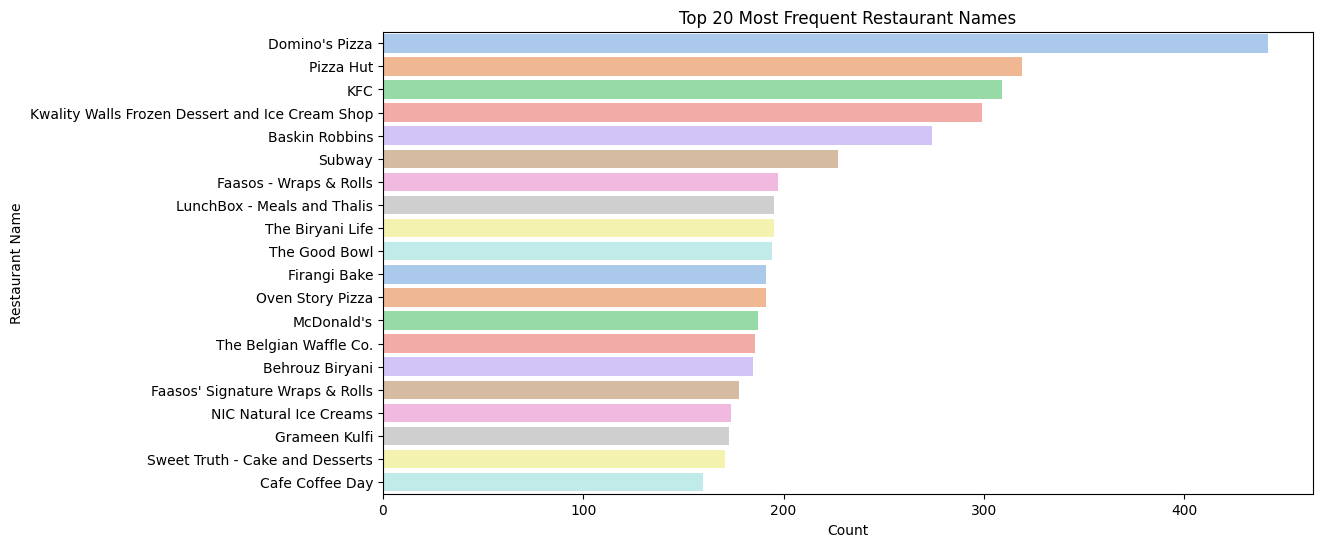

In [34]:

# Get the top 20 most frequent restaurant names
top_20_names = data['name'].value_counts().head(20)

# Plot the visulation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_names.values, y=top_20_names.index,  palette="pastel")

#labels and titles
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.title("Top 20 Most Frequent Restaurant Names")
plt.show()

***Key Insights:***
-
Domino's Pizza has the highest frequency, meaning it appears the most in the dataset.

Popular chains like Pizza Hut, KFC, Baskin Robbins, Subway, and McDonald's are among the most frequently listed restaurants.

Ice cream brands (Kwality Walls, NIC Natural Ice Creams, Grameen Kulfi) and dessert brands (Sweet Truth, The Belgian Waffle Co.) are also common.

The dataset likely includes many fast-food and dessert-focused restaurants.



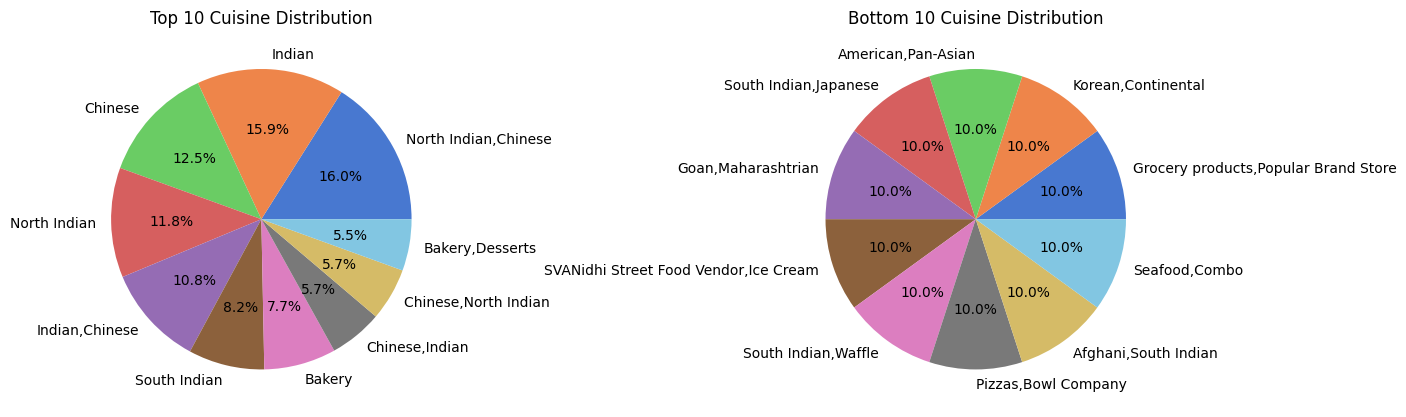

In [35]:

# Select top 10 and bottom 10 cuisines
top_cuisines = data["cuisine"].value_counts().head(10)
bottom_cuisines = data["cuisine"].value_counts().tail(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Top 10 Cuisines Pie Chart
axes[0].pie(top_cuisines, labels=top_cuisines.index, autopct="%1.1f%%", colors=sns.color_palette("muted"))
axes[0].set_title("Top 10 Cuisine Distribution")

# Bottom 10 Cuisines Pie Chart
axes[1].pie(bottom_cuisines, labels=bottom_cuisines.index, autopct="%1.1f%%", colors=sns.color_palette("muted"))
axes[1].set_title("Bottom 10 Cuisine Distribution")

plt.tight_layout()
plt.show()


***Insights from the Visualization:***
-
>Top 10 Cuisine Distribution:

The most popular cuisines include Indian, Chinese, North Indian, and South Indian.

Indian cuisine has the highest presence, followed by Chinese and North Indian.

>Bottom 10 Cuisine Distribution:

These cuisines have the lowest presence in the dataset.

Regional and fusion cuisines such as Gujarati-Italian, Tibetan-Arabian, and Khasi appear in this category.

Less common food types like Japanese-Fast Food and Continental-Hyderabadi are also included.


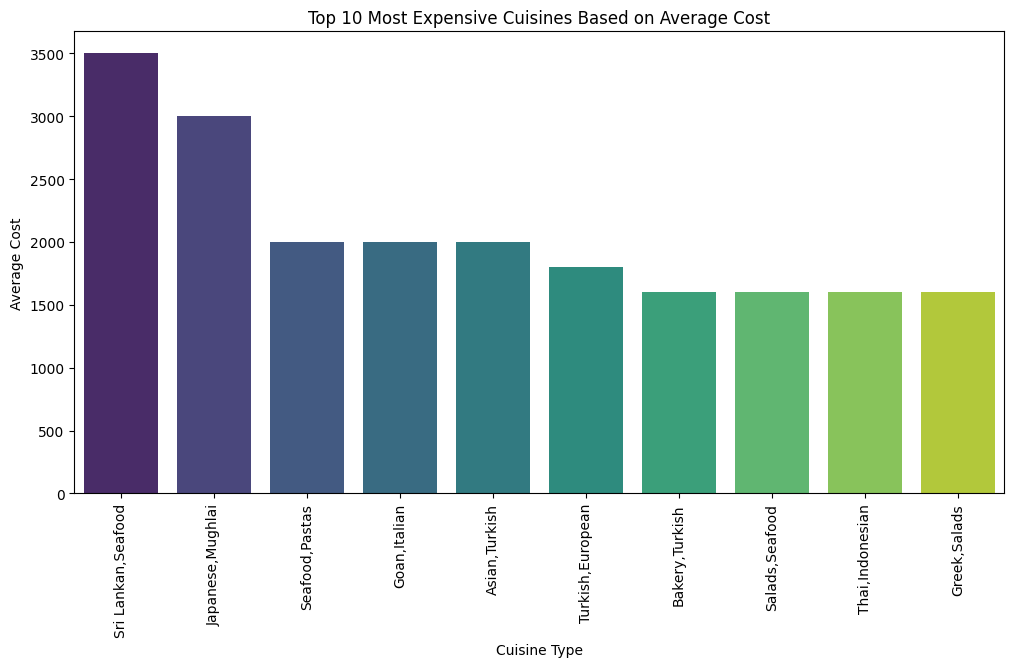

In [36]:
# Group by cuisine and calculate the average cost
top_cuisines_by_cost = data.groupby("cuisine")["cost"].mean().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines_by_cost.index, y=top_cuisines_by_cost.values, palette="viridis")
#labels and titles
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Cost")
plt.title("Top 10 Most Expensive Cuisines Based on Average Cost")
plt.show()


***Insights from the Visualization:***
-
Top Expensive Cuisines – The cuisines with the highest average cost are shown, making it easier to understand which ones are premium.

Sri Lankan & Japanese-Mughlai – These two cuisines have the highest average cost, indicating they might include high-end ingredients or fine dining experiences.

European, Seafood & Turkish Influence – Many of the top cuisines have a mix of European and seafood, possibly because of expensive imported ingredients.

In [37]:
#To Read the csv file and drop cloumns like lic_no, link, address and menu
data_cleaned =pd.read_csv("cleaned_data.csv").drop(columns=['lic_no', 'link', 'address', 'menu'])


In [38]:
# Extract only the city name (after the last comma) and remove any surrounding spaces
data_cleaned['city'] = data_cleaned['city'].str.split(',').str[-1].str.strip()

# Split the 'cuisine' string into a list and strip spaces from each item
data_cleaned['cuisine'] = data_cleaned['cuisine'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Initialize the MultiLabelBinarizer to convert list-type cuisines into one-hot encoded format
mlb = MultiLabelBinarizer()

# Transform the 'cuisine' column into multiple binary columns (one per unique cuisine)
cuisine_encoded = pd.DataFrame(mlb.fit_transform(data_cleaned['cuisine']), columns=mlb.classes_)

In [39]:
print(cuisine_encoded.columns.tolist())


['8:15 To 11:30 Pm', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Attractive Combos Available', 'Australian', 'Awadhi', 'BEVERAGE', 'Bakery', 'Bakery products', 'Bangladeshi', 'Barbecue', 'Bengali', 'Beverages', 'Bhutanese', 'Bihari', 'Biryani', 'Biryani - Shivaji Military Hotel', 'Bowl Company', 'British', 'Burgers', 'Burmese', 'Cafe', 'Chaat', 'Chettinad', 'Chinese', 'Coastal', 'Code valid on bill over Rs.99', 'Combo', 'Continental', 'Default', 'Desserts', 'Discount offer from Garden Cafe Express Kankurgachi', 'European', 'Fast Food', 'Free Delivery ! Limited Stocks!', 'French', 'German', 'Goan', 'Greek', 'Grill', 'Grocery products', 'Gujarati', 'Haleem', 'Healthy Food', 'Home Food', 'Hyderabadi', 'Ice Cream', 'Ice Cream Cakes', 'Indian', 'Indonesian', 'Italian', 'Italian-American', 'Jain', 'Japanese', 'Juices', 'Kashmiri', 'Kebabs', 'Kerala', 'Keto', 'Khasi', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'MAX 2 Combos per Order!', 'Maharashtrian', 'Mala

In [40]:
# Save column names to a CSV file
pd.Series(cuisine_encoded.columns).to_csv("cuisine_columns.csv", index=False, header=["cuisine_column"])


In [41]:
# Numerical columns
numerical_cols = data_cleaned[['rating', 'rating_count', 'cost']]

# intiliaze the one_hot encoder 
city_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#Apply one hot encoder for city cloumn and get features
city_encoded = pd.DataFrame(city_encoder.fit_transform(data_cleaned[['city']]), 
                            columns=city_encoder.get_feature_names_out(['city']))
# Combine all
final_encoded = pd.concat([numerical_cols, city_encoded, cuisine_encoded], axis=1)


In [42]:
# Save MultiLabelBinarizer for cuisine
with open("cuisine_encoder.pkl", "wb") as f:
    pickle.dump(mlb, f)

# Save OneHotEncoder for city
with open("city_encoder.pkl", "wb") as f:
    pickle.dump(city_encoder, f)


In [43]:
# Save column names to a CSV file
pd.Series(city_encoded.columns).to_csv("city_columns.csv", index=False, header=["city_column"])

# Save column names to a CSV file
pd.Series(cuisine_encoded.columns).to_csv("cuisine_columns.csv", index=False, header=["cuisine_column"])


In [44]:
# To check the shape of dataset
final_encoded.shape

(148299, 681)

In [45]:
#To check the index for both csv
print(data_cleaned.index.equals(final_encoded.index))


True


In [46]:
#To convert into csv file
data_cleaned.to_csv("data_cleanded.csv", index=False)

#To convert into Encoded csv file
final_encoded.to_csv("encoded_data.csv", index=False)

In [47]:
# --- Scale data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_encoded)


# --- Apply PCA ---
pca= PCA(n_components=30)  # You can increase/decrease depending on variance explained
pca_data = pca.fit_transform(scaled_data)

# --- Train KMeans ---
kmeans = KMeans(n_clusters=10, random_state=42,n_init=10)  # you can tune n_clusters
kmeans.fit(pca_data)

# --- Save PCA-transformed data ---
pd.DataFrame(pca_data).to_csv("pca_encoded_data.csv", index=False)

# --- Save PCA model ---
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

# --- Save models ---
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ KMeans and Scaler saved successfully!")


✅ KMeans and Scaler saved successfully!


In [48]:
# ✅ Save input column order for matching later
with open("pca_input_columns.pkl", "wb") as f:
    pickle.dump(final_encoded.columns.tolist(), f)